# Dada uma imagem de entrada f(x, y)

In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('sample.jpg', 0) # John Wick 4: Baba Yaga

## 1. Obtenha a transformada rápida de Fourier F(u, v) = F'{f(x, y)} usando o OpenCV e o Numpy.

In [145]:
f = np.fft.fft2(img)
fShift = np.fft.fftshift(f)
magnitudef = 20 * np.log(np.abs(f))
magnitudefShift = 20 * np.log(np.abs(fShift))

## 2. Apresenta as imagens Re{F(u, u)},Im{F(u, v)} e  |F(u, v)|. Mostre as imagens com e sem o fftshift.

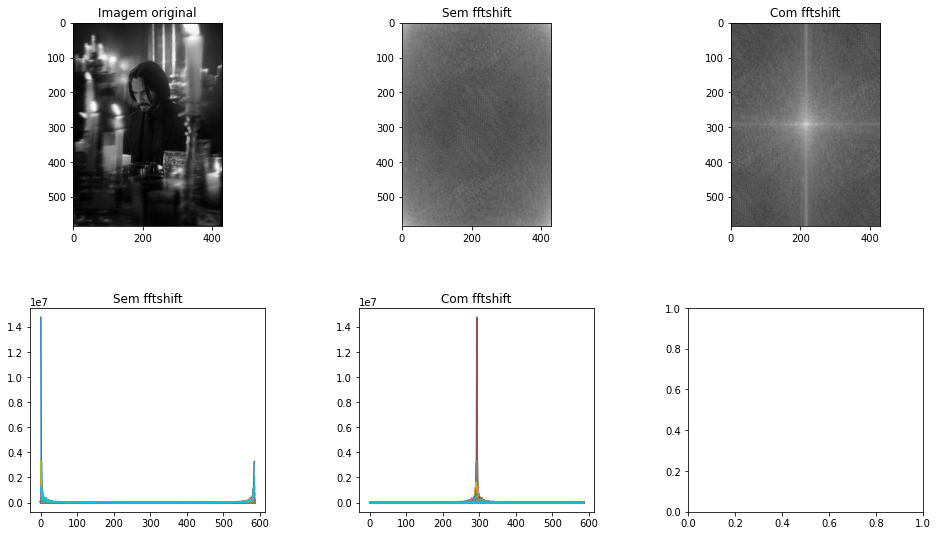

In [93]:
plt.subplots(2,3,figsize=(16,9))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(231)
plt.imshow(img, cmap='gray')
plt.title('Imagem original')
plt.subplot(232)
plt.imshow(magnitudef, cmap='gray')
plt.title('Sem fftshift')
plt.subplot(233)
plt.imshow(magnitudefShift, cmap='gray')
plt.title('Com fftshift')
plt.subplot(234)
plt.plot(np.abs(f))
plt.title('Sem fftshift')
plt.subplot(235)
plt.plot(np.abs(fShift))
plt.title('Com fftshift')
plt.show()

## 3. Efetue um escalonamento adequado de |F(u, v)| para melhor visualizar as baixas frequências.

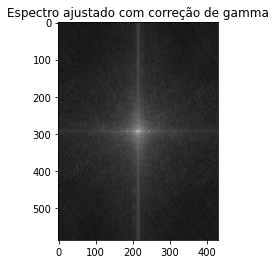

In [150]:
# extraido da ap1
def melhora_visualizacao(img):
    varGamma = 2.0 / 1.0
    table = (np.array([((i / 255.0) ** varGamma) * 255 for i in np.arange(0, 256)]).astype("uint8"))
    return cv2.LUT(img, table)
magUint8 = cv2.normalize(magnitudefShift, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
gammaCorrectedImg = melhora_visualizacao(magUint8)
plt.imshow(gammaCorrectedImg, cmap='gray')
plt.title('Espectro ajustado com correção de gamma')
plt.show()

## 4. Crie um filtro passa-baixas com resposta em frequência |H(u, v)| e apresente o resultado da filtragem da imagem f(x, y) por esse filtro.

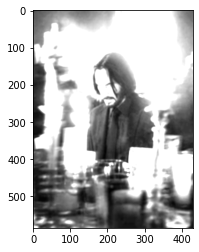

In [75]:
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)
lowPassFilterImg = cv2.filter2D(img, -1, kernel)
plt.imshow(lowPassFilterImg, cmap='gray')
plt.show()

## 5. Faça o mesmo para um filtro passa-altas. 

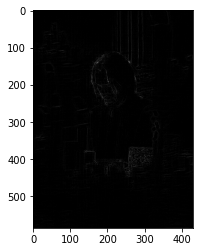

In [100]:
kernel = np.array([[0.0, 1.0, 0.0], 
                   [1.0, -4.0, 1.0],
                   [0.0, 1.0, 0.0]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
highPassFilterImg = cv2.filter2D(img, -1, kernel)
plt.imshow(highPassFilterImg, cmap='gray')